# 07wk-2: `numpy` (2)

최규빈  
2024-04-19

<a href="https://colab.research.google.com/github/guebin/PP2024/blob/main/posts/07wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-z5jT93Q_WPuVjZWi5r4T59&si=yLZVc9schGrDTHaj>

# 2. Imports

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import PIL

# 3. `numpy`의 랜덤모듈

## A. np.random.rand()

`-` 0~1 사이의 난수를 생성

In [5]:
np.random.rand(10)

`-` 0~2 사이의 난수를 생성

In [6]:
np.random.rand(10)*2

`-` 1~2사이의 난수를 생성

In [7]:
np.random.rand(10) + 1

`-` 1~3사이의 난수를 생성

In [8]:
np.random.rand(10)*2+1 #1~3

## B. np.random.randn()

`-` N(0,1)에서 난수생성

In [9]:
np.random.randn(10) # 표준정규분포에서 10개의 샘플 추출

`-` N(1,1)에서 난수생성

In [10]:
np.random.randn(10) + 1 

`-` N(0,4)에서 난수생성

In [11]:
np.random.randn(10)*2

`-` N(3,4)에서 난수생성

In [12]:
np.random.randn(10)*2 + 3

## C. np.random.choice()

`-` \[0,1,2,3,4\] 에서 임의의 원소를 하나 뽑는 방법

In [13]:
np.random.choice([0,1,2,3,4])

`-` \[0,1,2,3,4\] 에서 30개의 원소를 뽑는 방법

In [14]:
np.random.choice([0,1,2,3,4],size=30)

In [15]:
np.random.choice(range(5),size=30)

`-` \[‘사과’,‘딸기’,‘딸기’,‘배’\] 에서 10000개의 원소를 뽑는 방법

In [16]:
lst = list(np.random.choice(['사과','딸기','딸기','배'],size=10000))
{s:lst.count(s) for s in set(lst)}

`-` \[‘사과’,‘딸기’,‘딸기’,‘배’\] 에서 3개의 원소를 중복을 허용하지 않고
(= 뽑은걸 다시 넣지 않고) 뽑는 방법

In [17]:
np.random.choice(['사과','딸기','딸기','배'],size=3,replace=False) 

In [18]:
np.random.choice(['사과','딸기','딸기','배'],size=4,replace=False) 

In [19]:
np.random.choice(['사과','딸기','딸기','배'],size=5,replace=False) 

## D. np.random.randint()

`-` \[0,1,2,3\] 에서 하나의 정수를 뽑는 방법

In [20]:
#[0,1,2,3] 은 [0,4) 구간에 존재하는 정수로 해석가능함. 
np.random.randint(low=0,high=4) # = np.random.choice(range(4))

`-` \[0,1,2,3\] 에서 30개의 정수를 뽑는 방법

In [21]:
np.random.randint(low=0,high=4,size=30)

## E. 통계분포

`-` 균등분포에서 난수생성

In [22]:
np.random.uniform(low=0,high=1,size=10) # np.random.rand(10) 

In [23]:
np.random.uniform(low=0,high=2,size=10) # np.random.rand(10)*2

In [24]:
np.random.uniform(low=2,high=4,size=10) # np.random.rand(10)*2+2

`-` 정규분포에서 난수생성

In [25]:
np.random.normal(loc=0,scale=1,size=10) # np.random.randn(10)

In [26]:
np.random.normal(loc=0,scale=2,size=10) # np.random.randn(10)*2 

In [27]:
np.random.normal(loc=5,scale=2,size=10) # np.random.randn(10)*2 + 5 

`-` 이항분포

In [28]:
lst = np.random.binomial(n=2, p=0.5, size=10000).tolist()
{s:lst.count(s) for s in set(lst)}

`-` 포아송분포

In [29]:
np.random.poisson(lam=1.0,size=100)

# 4. `numpy` – 기타 유용한 기본기능들

## A. np.where, np.argwhere

`-` 1차원

In [30]:
a = np.array([0,0,0,1,0])
a

In [31]:
np.where(a==1), np.where(a==0)

In [32]:
np.argwhere(a==1), np.argwhere(a==0)

`-` 2차원

In [33]:
np.random.seed(43052)
a = np.random.randn(12).reshape(3,4)
a

In [34]:
np.where(a<0),np.argwhere(a<0)

In [35]:
a[1,2],a[1,3],a[2,0],a[2,1],a[2,3] 

-   인덱스를 읽기에는 np.argwhere 이 편한듯

의문: `np.where()`은 필요없는가? –\> 사실 `np.where()`이
`np.argwhere()`보다 쓸만함

In [36]:
np.random.seed(43052)
a = np.random.randn(12).reshape(3,4)
a

*a의 원소중 0보다 작은것을 출력하고 싶다면?*

In [37]:
a[np.where(a<0)] # 출력가능

In [38]:
a[np.argwhere(a<0)] # 출력불가능

*a의 원소중 0보다 작은것을 0으로 바꾸고 싶다면?*

In [39]:
np.random.seed(43052)
a = np.random.randn(12).reshape(3,4)
a

In [40]:
np.where(a<0,0,a) # a<0을 체크 -> 조건에 맞으면 0 -> 조건에 안맞으면 a

In [41]:
np.where(a<0,0,100) # a<0을 체크 -> 조건에 맞으면 0 -> 조건에 안맞으면 100

`-` 요약: `np.argwhere()`이 인덱스의 좌표를 읽을때 가독성이 있으나
조건에 맞는 원소를 출력하거나 처리할때는 `np.where()`이 유용함.

## B. 인덱싱 (실수하지마세요)

`-` 아래와 같은 2d-array를 고려하자.

In [42]:
a = np.arange(12).reshape(3,4)
a

`-` 첫번째 행을 뽑을때, 축의 숫자를 줄이고 싶을때도 있고 축의 숫자를
유지하고 싶을때도 있음.

In [43]:
a[0,:] # 첫번째 행을 뽑는코드1 = 축이 하나 줄어든다

In [44]:
a[[0],:] # 첫번째 행을 뽑는코드2 = 축의 숫자가 유지된다. 

`-` 세번째 열을 뽑을때, 축의 숫자를 줄이고 싶을때도 있고 축의 숫자를
유지하고 싶을때도 있음.

In [45]:
a[:,2] # 세번째 열을 뽑는코드1 = 축이 하나 줄어든다

In [46]:
a[:,[2]] # 세번째 열을 뽑는코드2 = 축의 숫자가 유지된다. 

## C. `np.ix_`

In [47]:
a = np.arange(12).reshape(3,4)
a

In [48]:
a[0:3,0:3]

In [49]:
a[[0,1,2],0:3]

In [50]:
a[0:3,[0,1,2]]

In [51]:
a[[0,1,2],[0,1,2]] # 이건 왜이래?

`-` 사실 np.where 에서 이러한 결과를 보긴했음

In [52]:
a[np.where(a % 5 ==0)]

In [53]:
a[[0,1,2],[0,1,2]] # 이 코드는 a[0:3,0:3] 와 다르다!

-   헷갈리게 만든건 맞음. 결론은 실수하면 안됨.

`-` 그런데 가끔은 `a[[0,1,2],[0,1,2]]` 이 `a[0:3,0:3]`를 의미하도록 하고
싶음.

In [54]:
a[[0,1,2],[0,1,2]] # 이건 이상하게 동작하는데..

In [55]:
a[np.ix_([0,1,2],[0,1,2])] # 이건 상식적으로 동작함..

## D. 메소드의 도움말을 자세히 확인하기

`-` 넘파이에서 `a.sum()`에 대한 도움말은 `np.sum`을 확인하면 더 자세하게
읽을 수 있음.

## E. hstack, vstack

`-` hstack, vstack을 쓰는 사람도 있다.

In [56]:
a = np.arange(6)
b = -a 

In [57]:
np.vstack([a,b]) # 출력이 2차원
# np.stack([a,b],axis=0) -- 이거랑 같은코드

In [58]:
np.hstack([a,b]) # 출력이 1차원
# np.concatenate([a,b],axis=0) -- 이거랑 같은 코드

## F. append

`-` 이걸 쓰는 사람도 있음

`-` 활용방법1: reshape(-1) + concat

In [59]:
a = np.arange(30).reshape(5,6)
b = -np.arange(8).reshape(2,2,2)

In [60]:
a, b

In [61]:
a.shape, b.shape

In [62]:
np.append(a,b)
# np.concatenate([a.reshape(-1), b.reshape(-1)]) -- 같은코드

`-` 활용방법2: reshape(-1) + concat

In [63]:
a = np.arange(2*3*4).reshape(2,3,4)
b = -a

In [64]:
a.shape, b.shape

In [65]:
np.append(a,b,axis=0)
#np.concatenate([a,b],axis=0) -- 이거랑 같은코드

*append와 concat은 약간의 차이가 있음 – append는 3개이상을 concat할 수
없음.*

In [66]:
a = np.arange(2*3*4).reshape(2,3,4)
b = -a
c = 2*a

In [67]:
np.concatenate([a,b,c],axis=0)

In [68]:
np.append(a,b,c,axis=0) # 3개는 에러..

## G. ravel, faltten

In [69]:
a = np.arange(2*3*4).reshape(2,3,4)
a

In [70]:
a.reshape(-1)

In [71]:
a.ravel()

In [72]:
a.flatten()

## H. 통계관련 함수들

`-` 평균, 중앙값

In [73]:
a = np.random.randn(1000)*2 + 1 
a.mean(), np.median(a)

`-` 표준편차, 분산

In [74]:
a = np.random.randn(1000)*2 + 1 
a.var(), a.std()

In [75]:
# 자유도의 조절
a.var(ddof=1), a.std(ddof=1)

`-` corr matrix, cov matrix

In [76]:
x = np.random.randn(10000)
y = np.random.randn(10000)*2
z = np.random.randn(10000)*0.5

In [77]:
np.cov([x,y,z]).round(2)

In [78]:
np.corrcoef([x,y,z]).round(2)

## I. `dtype`

`-` np.array 에는 항상 dtype이 있다.

In [79]:
a = np.array([1,2,3])
a.dtype

In [80]:
a = np.array([1.0, 2.0, 3.0])
a.dtype

`-` 같은 int라고 해도 int16, int32, int64와 같이 타입이 다를 수 있다.

In [81]:
a = np.array([1,2,3], dtype=np.int64)
a

In [82]:
a = np.array([1,2,3], dtype=np.int32)
a

In [83]:
a = np.array([1,2,3], dtype=np.int16)
a

`-` 같은 float라고 해도 float16, float32, float64와 같이 타입이 다를 수
있다.

In [84]:
a = np.array([1,2,3], dtype=np.float64)
a

In [85]:
a = np.array([1,2,3], dtype=np.float32)
a

In [86]:
a = np.array([1,2,3], dtype=np.float16)
a

`-` `dtype`은 아래와 같은 방법으로 변환할 수 있다.

In [87]:
a = np.array([1,2,3])
a

In [88]:
a.dtype

In [89]:
b = a.astype(np.float64)

In [90]:
a, b

`-` 문자열이 넘파이의 원소로 있는 경우

In [91]:
a = np.array(['a','b','c'])
a

In [92]:
a = np.array(['aa','b','c'])
a

In [93]:
a = np.array(['aaaa','b','c'])
a

`-` 문자열+숫자의혼합 -\> 각 원소의 자료형이 문자열로 통일됨

In [94]:
a = np.array([['Korea', 89],['Japan', 55]])
a

In [95]:
a[0,1] # 이것이 string으로 저장되어있다.

In [96]:
a[:,[1]].astype(np.int64)

## J. 브로드캐스팅과 시간측정

(예비학습)

In [97]:
import time 

In [98]:
t1 = time.time()

In [99]:
t2 = time.time()

In [100]:
t2 - t1 

예비학습 끝

`# 예제` – x=\[0,1,2,3,4\] 인 벡터가 있다고 가정하자. $(i,j)$-th 원소가
`(x[i]-x[j])**2`을 의미하는 (5,5) matrix를 구하라.

(풀이1) – 이건 이해하기 쉬움

In [101]:
x = np.array([0,1,2,3,4])
x

In [102]:
dist2 = np.zeros([5,5])
dist2

In [103]:
for i in range(5):
    for j in range(5):
        dist2[i,j] = (x[i]-x[j])**2 

In [104]:
dist2

(풀이2) – 이건 좀 이해하기 어려움

In [105]:
x1 = x.reshape(5,1)
x2 = x.reshape(1,5)

In [106]:
x1 # (5,1)
x2 # (1,5) 
x1-x2 

-   이 매트릭스의 (i,j)-th 원소는 `x[i]-x[j]`를 의미함

따라서 우리가 원하는 것은 아래와 같이 구할 수 있다.

In [107]:
(x1-x2)**2

------------------------------------------------------------------------

In [108]:
n = 10000
y = np.random.rand(n)
dist2 = np.zeros([n,n]) 
t1 = time.time()
for i in range(n):
    for j in range(n):
        dist2[i,j] = (y[i]-y[j])**2 
t2 = time.time()
t2-t1

In [109]:
t1 = time.time()
(y.reshape(n,1) - y.reshape(1,n))**2
t2 = time.time()
t2-t1 

# 5. `numpy`의 활용

## A. 이미지자료의 이해

`-` `plt.imshow(...)` 에서 `...`의 shape이 (??,??) 이러한 형태라면
흑백이미지를 출력

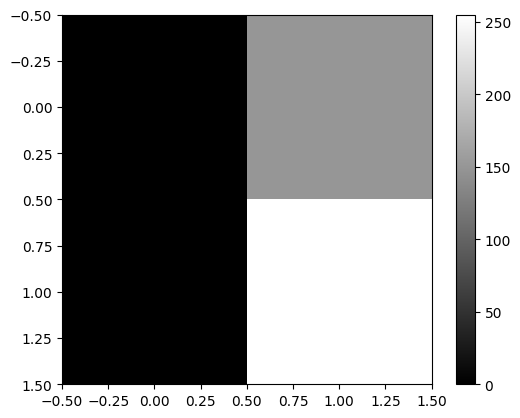

In [110]:
plt.imshow([[0,150],[0,255]],cmap='gray')
plt.colorbar()

`-` `plt.imshow(...)` 에서 `...`의 shape이 (??,??,3) 이러한 형태라면
칼라이미지를 출력

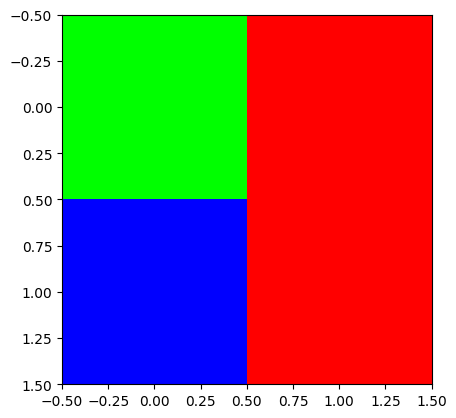

In [111]:
r = [[0,255],[0,255]] # (2,2)
g = [[255,0],[0,0]] # (2,2)
b = [[0,0],[255,0]] # (2,2) 
plt.imshow(np.stack([r,g,b],axis=-1))

`-` `plt.imshow(...)` 에서 `...`의 dtype이 int인지 float인지에 따라서
인식이 다름

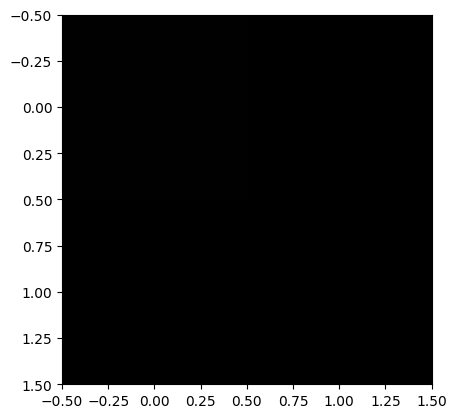

In [112]:
r = [[0,1],[0,1]] # (2,2)
g = [[1,0],[0,0]] # (2,2)
b = [[0,0],[1,0]] # (2,2) 
plt.imshow(np.stack([r,g,b],axis=-1))

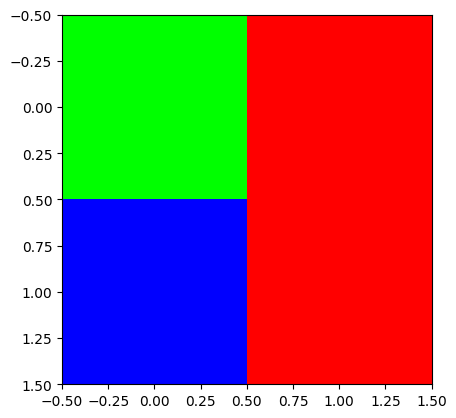

In [113]:
r = [[0,1],[0,1]] # (2,2)
g = [[1,0],[0,0]] # (2,2)
b = [[0,0],[1,0]] # (2,2) 
plt.imshow(np.stack([r,g,b],axis=-1).astype(np.float64))

-   이건 마치 1을 255로 생각한 결과

`###` – 예비학습 끝

## B. `hani`

In [127]:
!wget https://raw.githubusercontent.com/guebin/SC2022/main/hani.jpeg
hani = np.einsum('ijk->jik',np.array(PIL.Image.open('hani.jpeg'),dtype=np.int64)/255)
!rm hani.jpeg

--2024-04-20 14:44:18--  https://raw.githubusercontent.com/guebin/SC2022/main/hani.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2445959 (2.3M) [image/jpeg]
Saving to: ‘hani.jpeg’

hani.jpeg           100%[===================>]   2.33M  --.-KB/s    in 0.05s   

2024-04-20 14:44:18 (51.6 MB/s) - ‘hani.jpeg’ saved [2445959/2445959]


-   note: 위 코드는 코랩 혹은 리눅스기반 환경에서 동작가능.

불러온 이미지는 아래와 같다.

In [128]:
hani,hani.shape

-   이미지는 4032 $\times$ 3024 개의 격자(픽셀)로 이루어져 있음

이미지를 보는 방법은 아래와 같다.

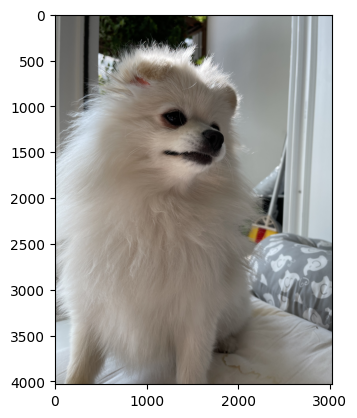

In [129]:
plt.imshow(hani) # 모든이미지, 하니매트릭스

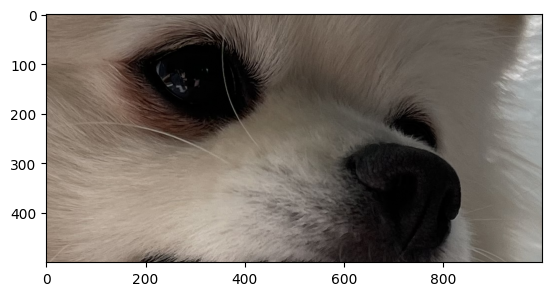

In [130]:
plt.imshow(hani[1000:1500, 1000:2000,:]) # 얼굴만 확대, 하니의 서브매트릭스 

`(1)` 하니이미지를 나타내는 어레이를 변형하여 빨간색을 의미하는 칼라만
남겨서 “빨간하니”를 만들고 이미지를 출력하라.

`(풀이1)` – 제가 원래 하려고 했던 풀이

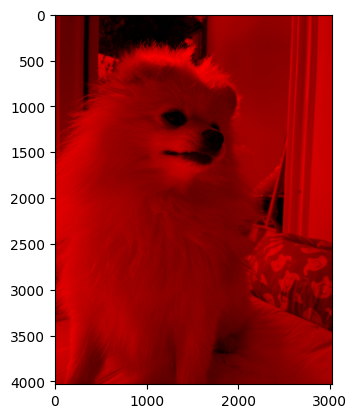

In [131]:
plt.imshow(np.stack([hani[:,:,0], hani[:,:,0]*0, hani[:,:,0]*0],axis=-1))

(풀이2) – GPT이용하여 얻은 힌트

In [132]:
# hani[:,:,1].fill(0)
# hani[:,:,2].fill(0)

In [133]:
# plt.imshow(hani)

`(2)` 하니의 모든 값에 루트를 취하여 “루트하니”를 만들고 “원본하니”와
“루트하니”를 좌우로 나란히 배치하여 출력하라.

`(풀이)`

In [134]:
root_hani = np.sqrt(hani) 

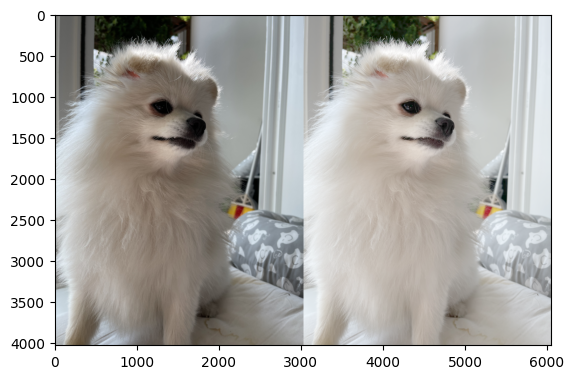

In [135]:
plt.imshow(np.concatenate([hani,root_hani],axis=1))

`(3)` 하니의 모든값에 아래와 같은 함수를 적용하라.

-   $f(x)=\begin{cases} \sqrt{x} & x>0.75 \\ x & x \leq 0.75 \end{cases}$

함수의 결과로 얻어진 매트릭스를 “후광하니”라고 부르자. “원본하니”와
“후광하니”를 좌우로 나란히 배치하여 출력하라.

`(풀이)`

In [136]:
shining_hani = np.where(hani>0.75, np.sqrt(hani), hani)

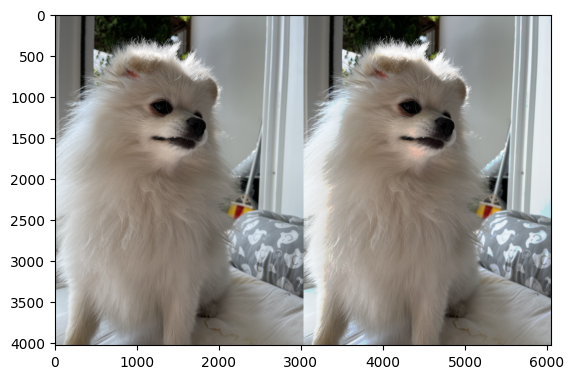

In [137]:
plt.imshow(np.concatenate([hani,shining_hani],axis=1))

## C. MNIST data

아래는 0~9가지의 숫자이미지가 저장된 이미지데이터를 불러오는 코드이다.

In [138]:
# URL 설정
url = 'https://github.com/guebin/PP2023/raw/main/posts/02_DataScience/mnist.npz'

# URL에서 파일 다운로드
urllib.request.urlretrieve(url, './mnist.npz')

# 데이터 로드
data = np.load('./mnist.npz')
xtrain, ytrain, xtest, ytest = data['x_train']/255, data['y_train'], data['x_test']/255, data['y_test']

# mnist.npz 삭제
!rm mnist.npz

In [139]:
print(f'이미지: xtrain -- {xtrain.shape}, xtest -- {xtest.shape}')
print(f'라벨: ytrain -- {ytrain.shape}, ytest -- {ytest.shape}')

이미지: xtrain -- (60000, 28, 28), xtest -- (10000, 28, 28)
라벨: ytrain -- (60000,), ytest -- (10000,)

아래는 데이터에 대한 설명이다.

-   전체의 이미지의 수는 70000개이며, 60000개의 이미지 ${\tt xtrain}$에
    10000개의 이미지는 ${\tt xtest}$에 저장되어 있다.
-   이미지에 대한 라벨은 각각 ${\tt ytrain}$과 $\tt ytest$에 저장되어
    있다. 따라서 $\tt ytrain$에는 60000개의 이미지에 해당하는 라벨이,
    $\tt ytest$에는 10000개의 이미지에 해당하는 라벨이 기록되어 있다.

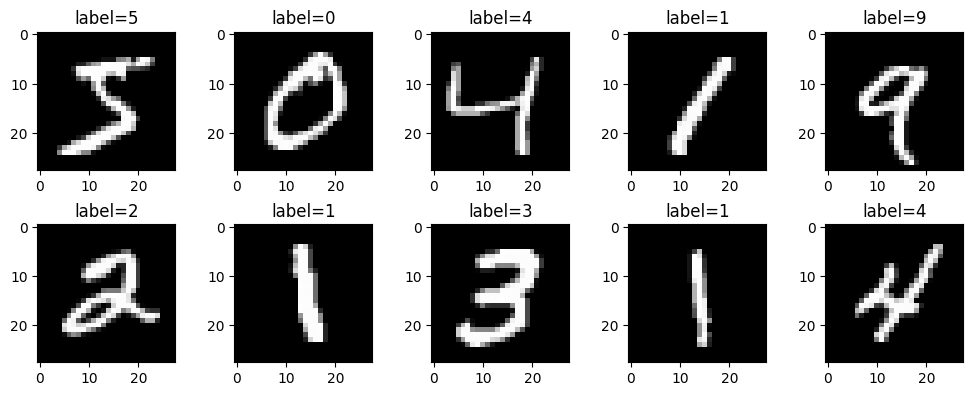

In [144]:
fig, ax = plt.subplots(2,5,figsize=(10,4))

ax[0][0].imshow(xtrain[0],cmap='gray'); ax[0][0].set_title(f'label={ytrain[0]}');
ax[0][1].imshow(xtrain[1],cmap='gray'); ax[0][1].set_title(f'label={ytrain[1]}');
ax[0][2].imshow(xtrain[2],cmap='gray'); ax[0][2].set_title(f'label={ytrain[2]}');
ax[0][3].imshow(xtrain[3],cmap='gray'); ax[0][3].set_title(f'label={ytrain[3]}');
ax[0][4].imshow(xtrain[4],cmap='gray'); ax[0][4].set_title(f'label={ytrain[4]}');

ax[1][0].imshow(xtrain[5],cmap='gray'); ax[1][0].set_title(f'label={ytrain[5]}');
ax[1][1].imshow(xtrain[6],cmap='gray'); ax[1][1].set_title(f'label={ytrain[6]}');
ax[1][2].imshow(xtrain[7],cmap='gray'); ax[1][2].set_title(f'label={ytrain[7]}');
ax[1][3].imshow(xtrain[8],cmap='gray'); ax[1][3].set_title(f'label={ytrain[8]}');
ax[1][4].imshow(xtrain[9],cmap='gray'); ax[1][4].set_title(f'label={ytrain[9]}');

fig.tight_layout()

`(1)` 70000개의 이미지중 0~9에 해당하는 이미지는 각각 몇장씩 들어있는가?

(풀이)

In [145]:
y = np.concatenate([ytrain,ytest]).tolist()

In [146]:
{s:y.count(s) for s in set(y)}

`(2)` ${\tt xtrain}$에서 손글씨 0을 의미하는 이미지만을 모아서 새로운
다차원 array ${\tt xtrain0}$를 만들어라. 이 다차원 array 에서 처음과
마지막 이미지를 출력하라.

**hint:** ${\tt xtrain0}$ 의 shape은 (5923,28,28)이어야 한다.

(풀이)

In [147]:
xtrain0 = xtrain[ytrain == 0] # 숫자0이 라벨로 기록된 이미지들 

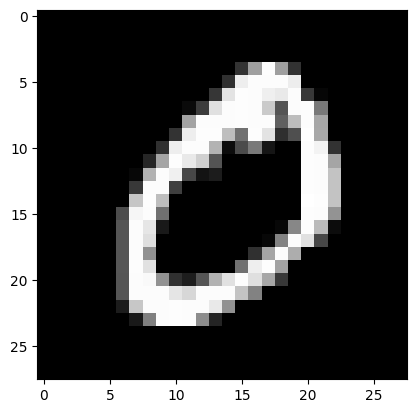

In [148]:
plt.imshow(xtrain0[0],cmap="gray")

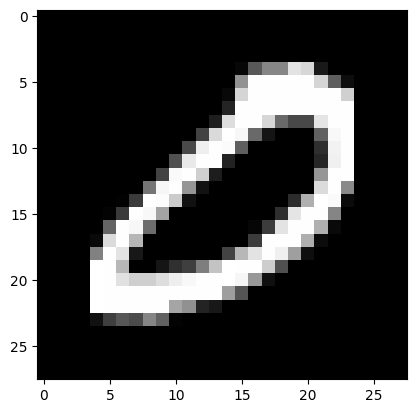

In [149]:
plt.imshow(xtrain0[-1],cmap="gray")

`(3)` ${\tt xtrain}$에서 손글씨 0을 의미하는 이미지들의 평균을 계산하라.
즉 아래를 계산하라.

-   ${\tt xtrain0mean} = \frac{1}{5923}\sum_{i=1}^{5923} {\tt xtrain0[i, :, :]}$

계산결과를 출력하라.

(풀이)

첫번째 이미지 (왼쪽) 두번째 이미지 (가운데) 와 처음 두개의 이미지의 평균
(오른쪽) 은 아래와 같이 나타낼 수 있다.

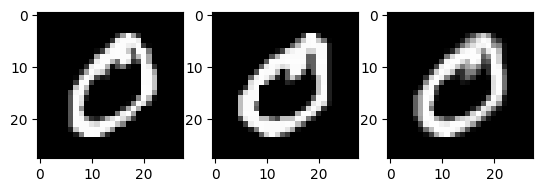

In [150]:
fig,ax = plt.subplots(1,3)
ax[0].imshow(xtrain0[0],cmap="gray")
ax[1].imshow(xtrain0[1],cmap="gray")
#ax[2].imshow((xtrain0[0]+xtrain0[1])/2,cmap="gray")
ax[2].imshow(xtrain0[[0,1]].mean(axis=0),cmap="gray")

전체이미지의 평균은 아래와 같다.

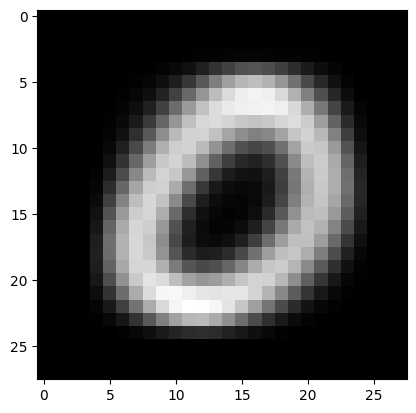

In [151]:
plt.imshow(xtrain0.mean(axis=0),cmap='gray')

`(4)` ${\tt xtrain}$에서 각 라벨에 대한 평균이미지를 계산하고 계산결과를
${\tt imgmean}$에 길이가 10인 `list`로 저장하라. 즉 ${\tt imgmean}$은
아래와 같은 자료구조를 가지고 있어야 한다.

-   ${\tt imgmean}=\big[{\tt imgmean[0]},\dots, {\tt imgmean[9]}\big]$
-   ${\tt imgmean[0]}, \dots, {\tt imgmean[9]}$ 는 각각 (28,28)의
    shape을 가진 numpy array
-   ${\tt imgmean[0]}, \dots, {\tt imgmean[9]}$ 는 각각 숫자 0,1, …, 9의
    평균이미지를 의미

${\tt imgmean[0]},\dots, {\tt imgmean[9]}$를 시각화 하라.

(풀이)

In [152]:
imgmean = [xtrain[ytrain == i].mean(axis=0) for i in range(10)]

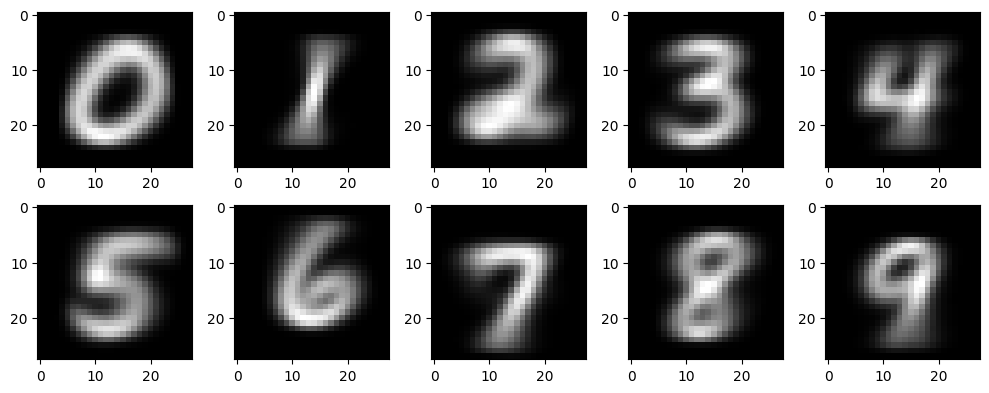

In [153]:
fig, ax = plt.subplots(2,5,figsize=(10,4))

ax[0][0].imshow(imgmean[0],cmap='gray')
ax[0][1].imshow(imgmean[1],cmap='gray')
ax[0][2].imshow(imgmean[2],cmap='gray')
ax[0][3].imshow(imgmean[3],cmap='gray')
ax[0][4].imshow(imgmean[4],cmap='gray')

ax[1][0].imshow(imgmean[5],cmap='gray')
ax[1][1].imshow(imgmean[6],cmap='gray')
ax[1][2].imshow(imgmean[7],cmap='gray')
ax[1][3].imshow(imgmean[8],cmap='gray')
ax[1][4].imshow(imgmean[9],cmap='gray')

fig.tight_layout()

`(5)` ${\tt xtrain}$의 두번째 이미지와 ${\tt imgmean[0]}$의 차이를
제곱한 값의 평균을 구하라. 즉 아래를 계산하라.

-   $mean\Big(({\tt xtrain[1]}-{\tt imgmean[0]})^2\Big)$

(풀이)

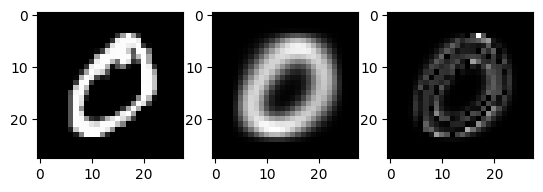

In [154]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(xtrain[1],cmap="gray")
ax[1].imshow(imgmean[0],cmap="gray")
ax[2].imshow((xtrain[1]-imgmean[0])**2,cmap="gray")

In [155]:
((xtrain[1]-imgmean[0])**2).mean()

`(6)` 모든 $j=0,1,\dots,9$ 에 대하여 아래를 계산하라.

-   $mean\Big(({\tt xtrain[1]}-{\tt imgmean[j]})^2\Big)$

계산값이 가장 작게 나오는 $j$는 얼마인가? 위의 계산결과를 토대로
${\tt xtrain}$의 두번째 이미지는 어떠한 숫자를 의미한다고 “분류”하는
것이 타당한가?

`(풀이)`

In [156]:
{j:((xtrain[1]-imgmean[j])**2).mean() for j in range(10)}

`((xtrain[1]-imgmean[j])**2).mean()` 를 가장 작게만드는 j는 0 이다.

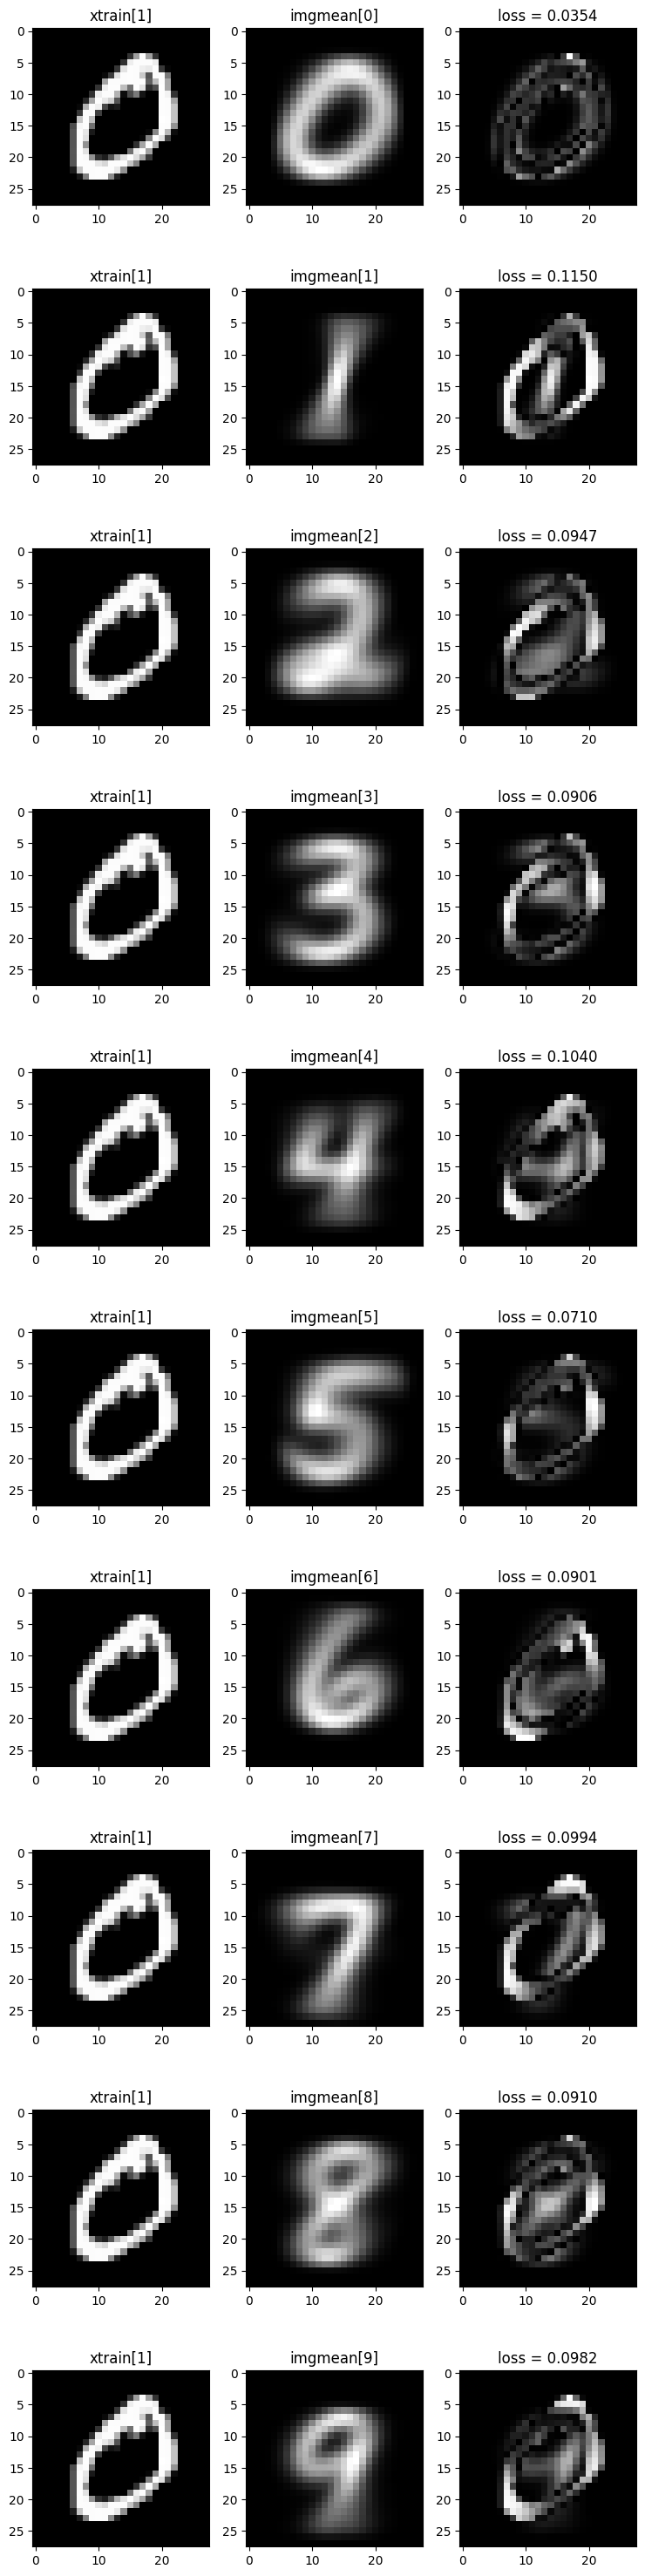

In [157]:
fig, ax = plt.subplots(10,3,figsize=(7.5,30))
for j in range(10):
    ax[j][0].imshow(xtrain[1],cmap="gray"); 
    ax[j][0].set_title("xtrain[1]")
    ax[j][1].imshow(imgmean[j],cmap="gray")
    ax[j][1].set_title(f"imgmean[{j}]")
    ax[j][2].imshow((xtrain[1]-imgmean[j])**2,cmap="gray")
    ax[j][2].set_title(f'loss = {((xtrain[1]-imgmean[j])**2).mean():.4f}')
fig.tight_layout()

xtrain\[1\] 이미지는 0으로 분류하는게 타당해보인다.

`(7)` 아래와 같은 numpy array 를 생성하라.

$${\tt loss}= 
\begin{bmatrix} 
{\tt loss[0,0]} & \dots & {\tt loss[0,9]} \\ 
{\tt loss[1,0]} & \dots & {\tt loss[1,9]} \\ 
\dots & \dots &  \dots \\ 
{\tt loss[59999,0]}& \dots &{\tt loss[59999,9]} \\ 
\end{bmatrix}$$

단,
${\tt loss[i,j]} = mean\Big(({\tt xtrain[i]}-{\tt imgmean[j]})^2\Big)$

위에서 생성한 ${\tt loss}$를 이용해 (6)와 같은 방식으로 ${\tt xtrain}$의
모든 이미지에 대한 분류를 수행하라.

**hint**: ${\tt loss}$에서 “최소값을 가지는 원소의 인덱스를 출력”하는
함수를 각 행별로 적용하면 된다.

(풀이)

In [158]:
loss = np.array([[np.mean((xtrain[i] - imgmean[j])**2) for j in range(10)] for i in range(60000)])
loss

In [159]:
loss.argmin(axis=-1) # 꽤 그럴듯하게 예측하고 있음

`(8)` `(7)`에서 수행한 분류결과와 실제 라벨 ${\tt ytrain}$을 비교하라.
얼마나 많은 결과가 일치하는지 비율을 계산하라.

(풀이)

In [160]:
sum(ytrain == loss.argmin(axis=-1)) / 60000

In [161]:
(ytrain == loss.argmin(axis=-1)).mean()

`(9)` ${\tt xtrain}$에서 학습한 평균이미지 ${\tt imgmean}$를 바탕으로
${\tt xtest}$의 이미지를 분류하라. 분류결과를 ${\tt ytest}$와 비교하라.
얼마나 많은 결과가 일치하는지 비율을 계산하라.

(풀이)

In [162]:
loss = np.array([[np.mean((xtest[i] - imgmean[j])**2) for j in range(10)] for i in range(10000)])
(loss.argmin(axis=-1) == ytest).mean()

`(10)` `(9)`의 과정에서 잘못분류된 이미지 10개를 선택하여 시각화 하라.

-   실제 라벨과 잘못된 라벨을 구분하여 시각화 할 것

In [171]:
np.sum(loss.argmin(axis=-1) != ytest) # 잘못분류된것

In [190]:
img = xtest[loss.argmin(axis=-1) != ytest] # 잘못분류된 이미지
label = ytest[loss.argmin(axis=-1) != ytest] # 잘못분류된 이미지의 실제라벨
estimated = loss.argmin(axis=-1)[loss.argmin(axis=-1) != ytest] # 잘못분류된 이미지의 예측된라벨

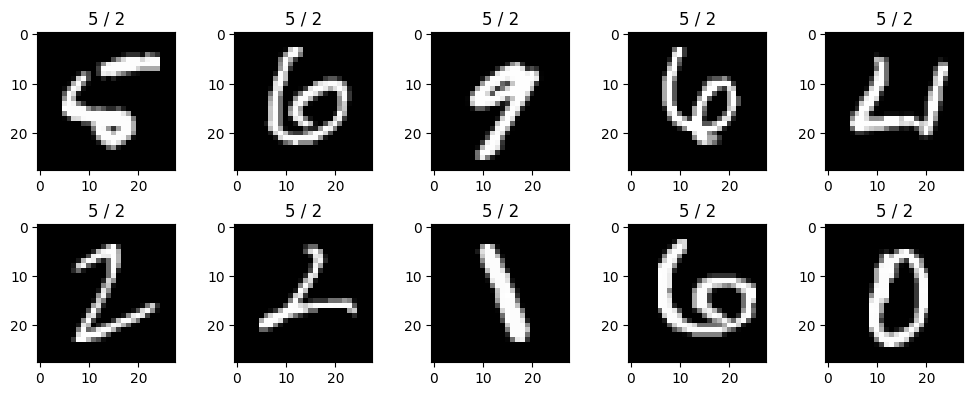

In [195]:
fig,ax = plt.subplots(2,5,figsize=(10,4))
for i in range(2):
    for j in range(5):      
        ax[i][j].imshow(img[i*5+j],cmap='gray')
        ax[i][j].set_title(f"{label[0]} / {estimated[0]}")
fig.tight_layout()